# Fake News Analysis
- Preston Knepper
- Zachary Eanes
- Kevin McCall

__Link to Dataset:__ https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification

## Exploritory data anlysis.

In [47]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

df = pd.read_csv("WELFake_Dataset.csv")

In [48]:
print("==== HEAD ====\n", df.head(10), "\n")
print("==== SAMPLE ====\n", df.sample(10), "\n")
print(df.info())

==== HEAD ====
    Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   
5           5  About Time! Christian Group Sues Amazon and SP...   
6           6  DR BEN CARSON TARGETED BY THE IRS: “I never ha...   
7           7  HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...   
8           8  Sports Bar Owner Bans NFL Games…Will Show Only...   
9           9  Latest Pipeline Leak Underscores Dangers Of Da...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last 

There are less than 1000 missing titles and less than 100 missing texts. So we will just remove them.

In [49]:
df = df.dropna()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 71537 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  71537 non-null  int64 
 1   title       71537 non-null  object
 2   text        71537 non-null  object
 3   label       71537 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.7+ MB
None


In [50]:
df['label'] = df['label'].astype('category')

Our dataset had 4 columns with 71,537 entries (after removal). The columns are id, title, text, and label. Id will not be used, Title is the title of the news article, Text is the body text of the news article, and label is 1 if the article is true and 0 if the article is false.

We will be looking into the distribution of title and text lengths as well as the distributions of real vs fake articles.

In [51]:
df["label"].value_counts()

label
1    36509
0    35028
Name: count, dtype: int64

We have roughly equal counts of fake new and real new articles.

In [52]:
with_len = df.copy()
with_len["title_len"] = with_len["title"].apply(len)
with_len["text_len"] = with_len["text"].apply(len)
with_len.head()

def count_uppercase(text):
    count = 0
    for char in text:
        if char.isalpha() and char.upper() == char:
            count += 1
    return count

with_len["uppercase_title_len"] = with_len["title"].apply(count_uppercase)
with_len["uppercase_text_len"] = with_len["text"].apply(count_uppercase)

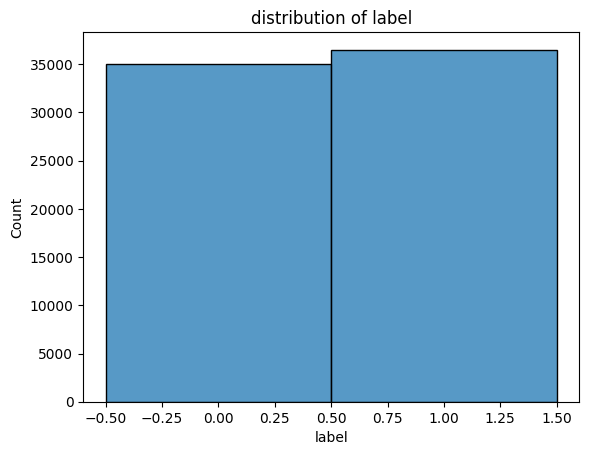

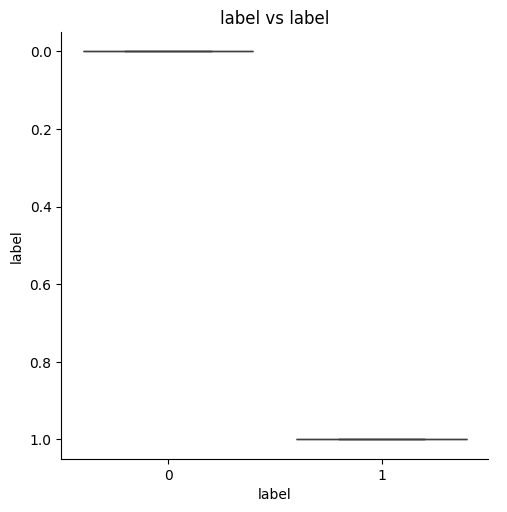

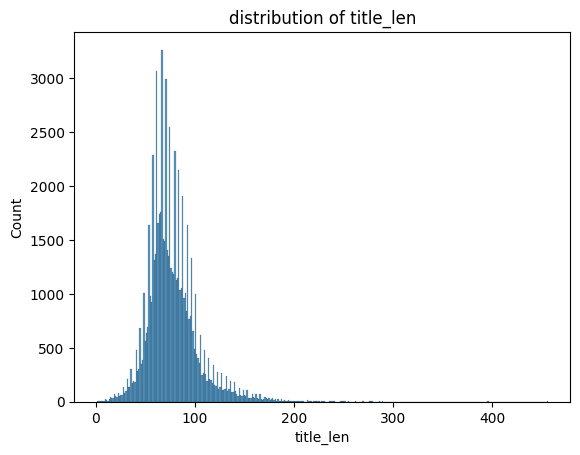

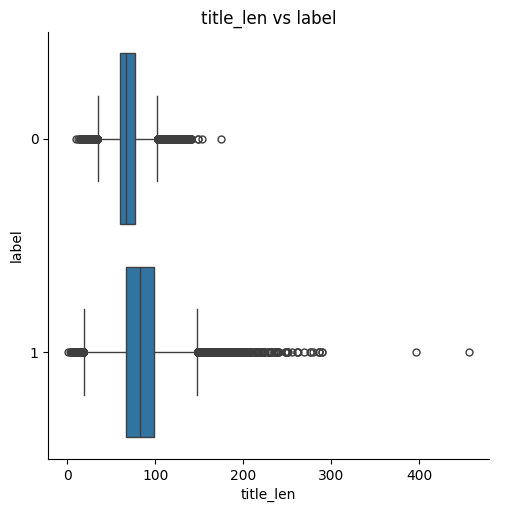

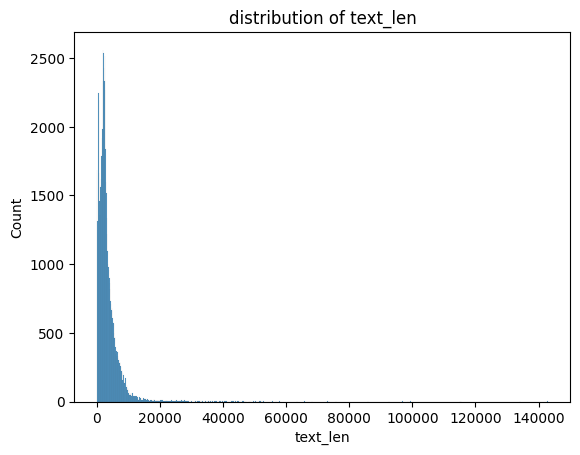

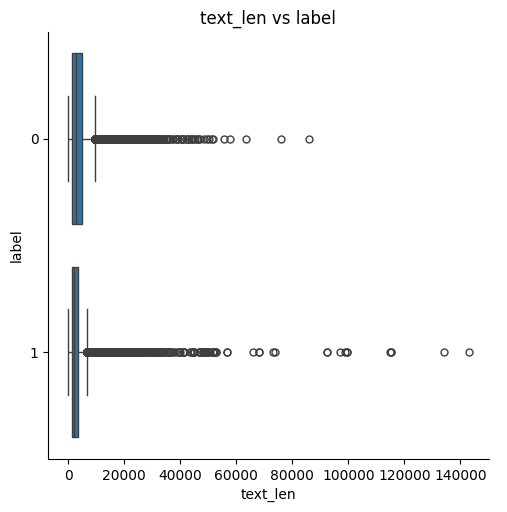

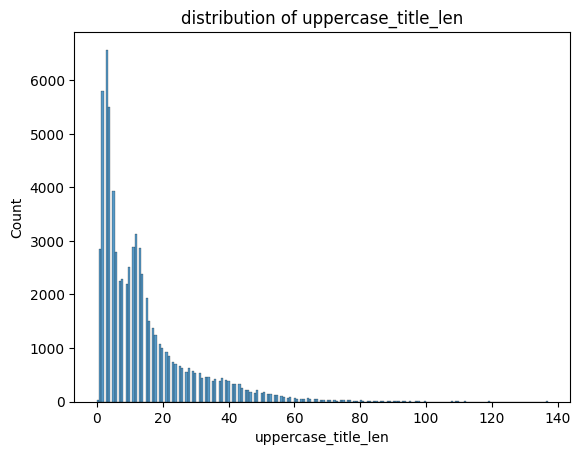

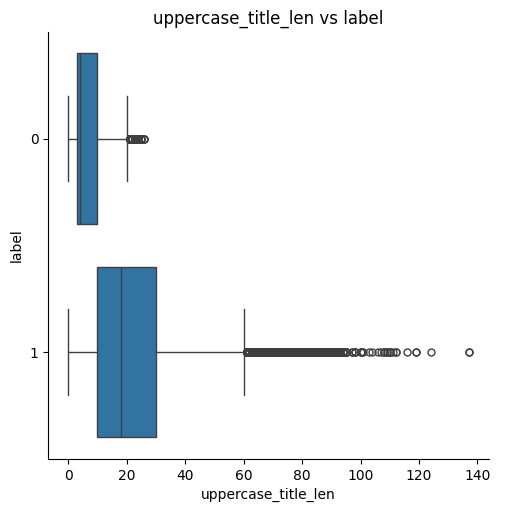

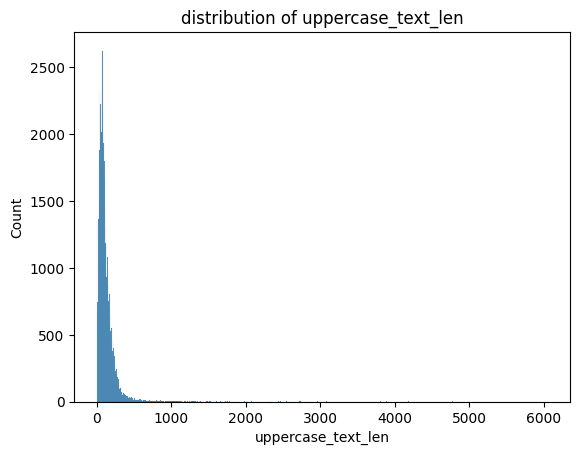

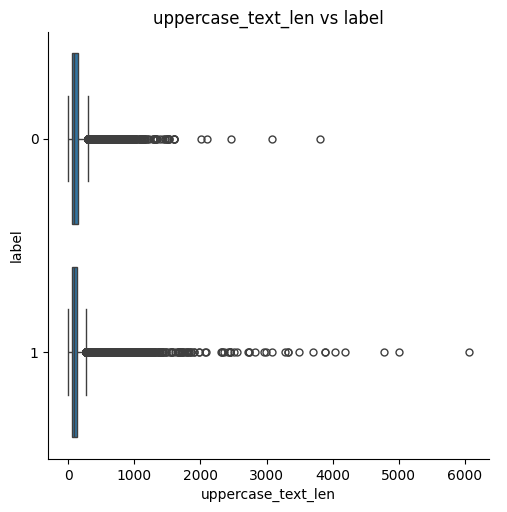

In [53]:
for name in ["label", "title_len", "text_len", "uppercase_title_len", "uppercase_text_len"]:
    sn.histplot(with_len[name])
    plt.title(f"distribution of {name}")
    plt.show()
    sn.catplot(data=with_len, x=name, y="label", kind="box")
    plt.title(f"{name} vs label")
    plt.show()

In [54]:
too_long = with_len[with_len["text_len"] > 60000].index

df.drop(too_long, inplace=True)
with_len.drop(too_long, inplace=True)

Since we cannot visually tell a correlation between length and fakeness and since there are 19 major outliers with > 60000 text_len, we will drop these articles.  

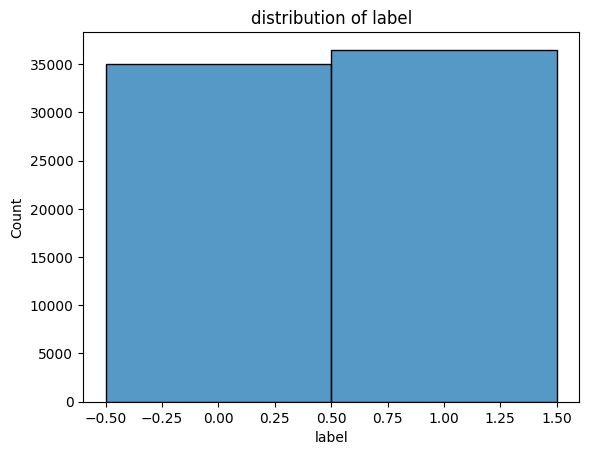

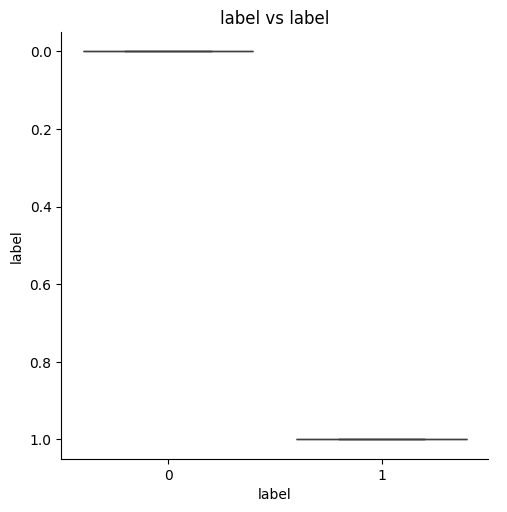

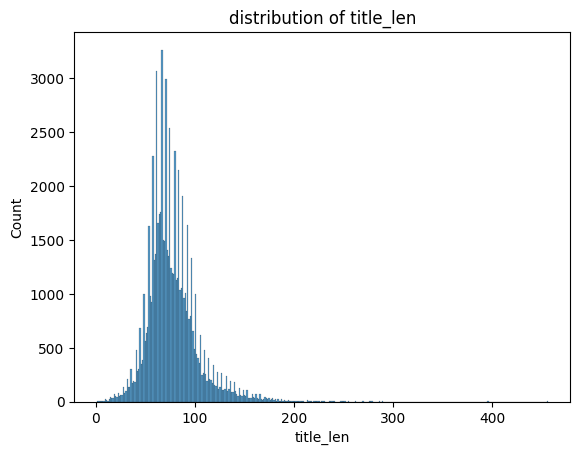

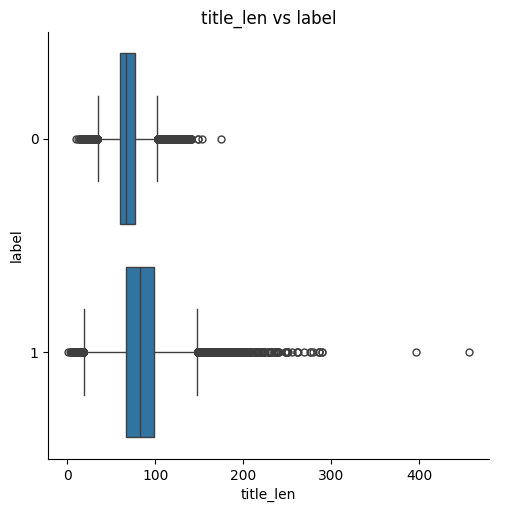

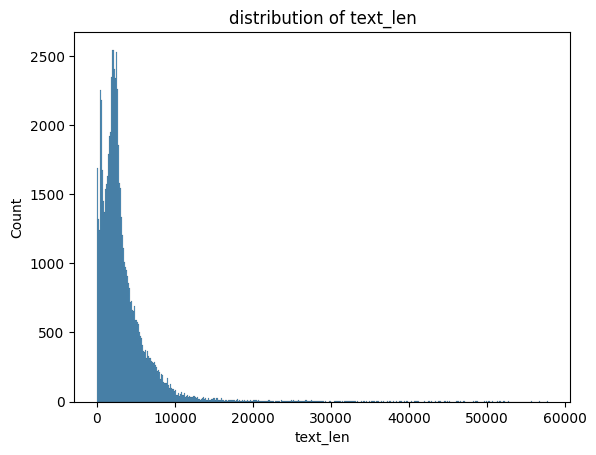

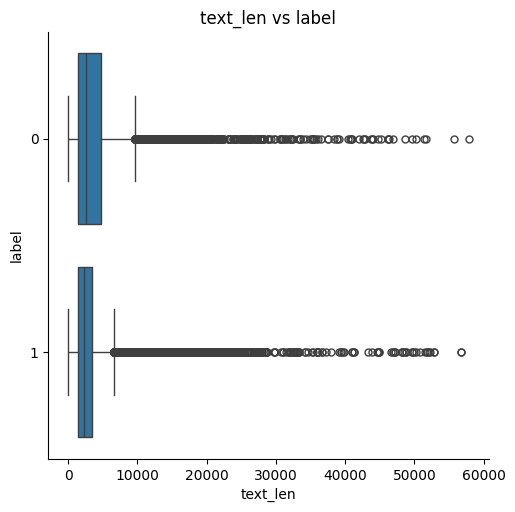

KeyError: 'uppercase_title'

In [ ]:
for name in ["label", "title_len", "text_len", "uppercase_title_len", "uppercase_text_len"]:
    sn.histplot(with_len[name])
    plt.title(f"distribution of {name}")
    plt.show()
    sn.catplot(data=with_len, x=name, y="label", kind="box")
    plt.title(f"{name} vs label")
    plt.show()